In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
os.chdir('/content/drive/MyDrive/Colab Notebooks/Prodigy_ML')
print('current Directory: ', os.getcwd())

In [ ]:
!kaggle datasets download shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
100% 785M/788M [00:30<00:00, 27.1MB/s]
100% 788M/788M [00:30<00:00, 27.5MB/s]


In [ ]:
!unzip microsoft-catsvsdogs-dataset.zip

In [ ]:
main_path = '/content/drive/MyDrive/Colab Notebooks/Prodigy_ML'
print('number of Cat Images: ', os.listdir(main_path + '/PetImages/Cat').__len__())

print('number of Dog Images: ', os.listdir(main_path + '/PetImages/Dog').__len__())

number of Cat Images:  12501
number of Dog Images:  12501


Dog Image Shape: (500, 327, 3)
Cat Image Shape: (281, 300, 3)


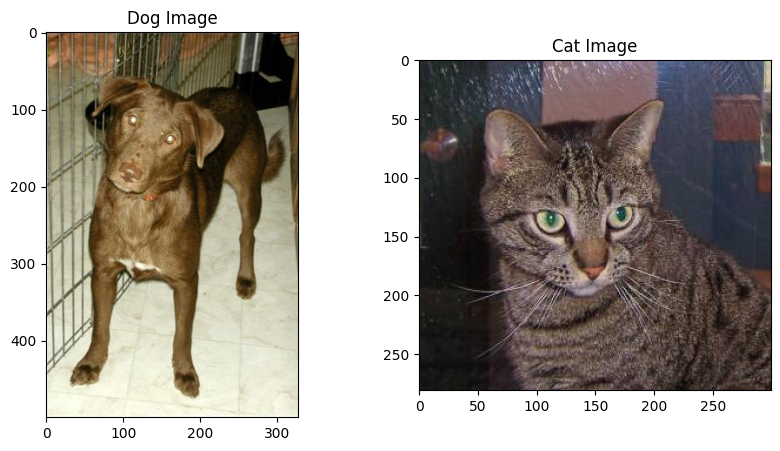

In [ ]:
# this is for getting an idea of the size of the images
dog_image_path = main_path + '/PetImages/Dog/1.jpg'
cat_image_path = main_path + '/PetImages/Cat/1.jpg'

try:
    dog_img = cv2.imread(dog_image_path)
    cat_img = cv2.imread(cat_image_path)

    if dog_img is not None and cat_img is not None:
        print("Dog Image Shape:", dog_img.shape)
        print("Cat Image Shape:", cat_img.shape)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
        plt.title("Dog Image")
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
        plt.title("Cat Image")
        plt.show()

    else:
        print("Error loading one or both images. Please check the file paths.")

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
Images = []
labels = []
for folder in os.listdir(main_path + '/PetImages'):
  for image in tqdm(os.listdir(main_path + '/PetImages/' + folder)):
    img_path = os.path.join(main_path, 'PetImages', folder, image) # construct full image path
    image = cv2.imread(img_path)
    if image is None:
      # print(f"Error loading image: {img_path}") # print the problematic image path
      continue
    try:
      image = cv2.resize(image, (100, 100))
      Images.append(image)
      labels.append(folder)
    except Exception as e:
      print(f"Error processing image {img_path}: {e}")

100%|██████████| 12501/12501 [04:22<00:00, 47.69it/s] 


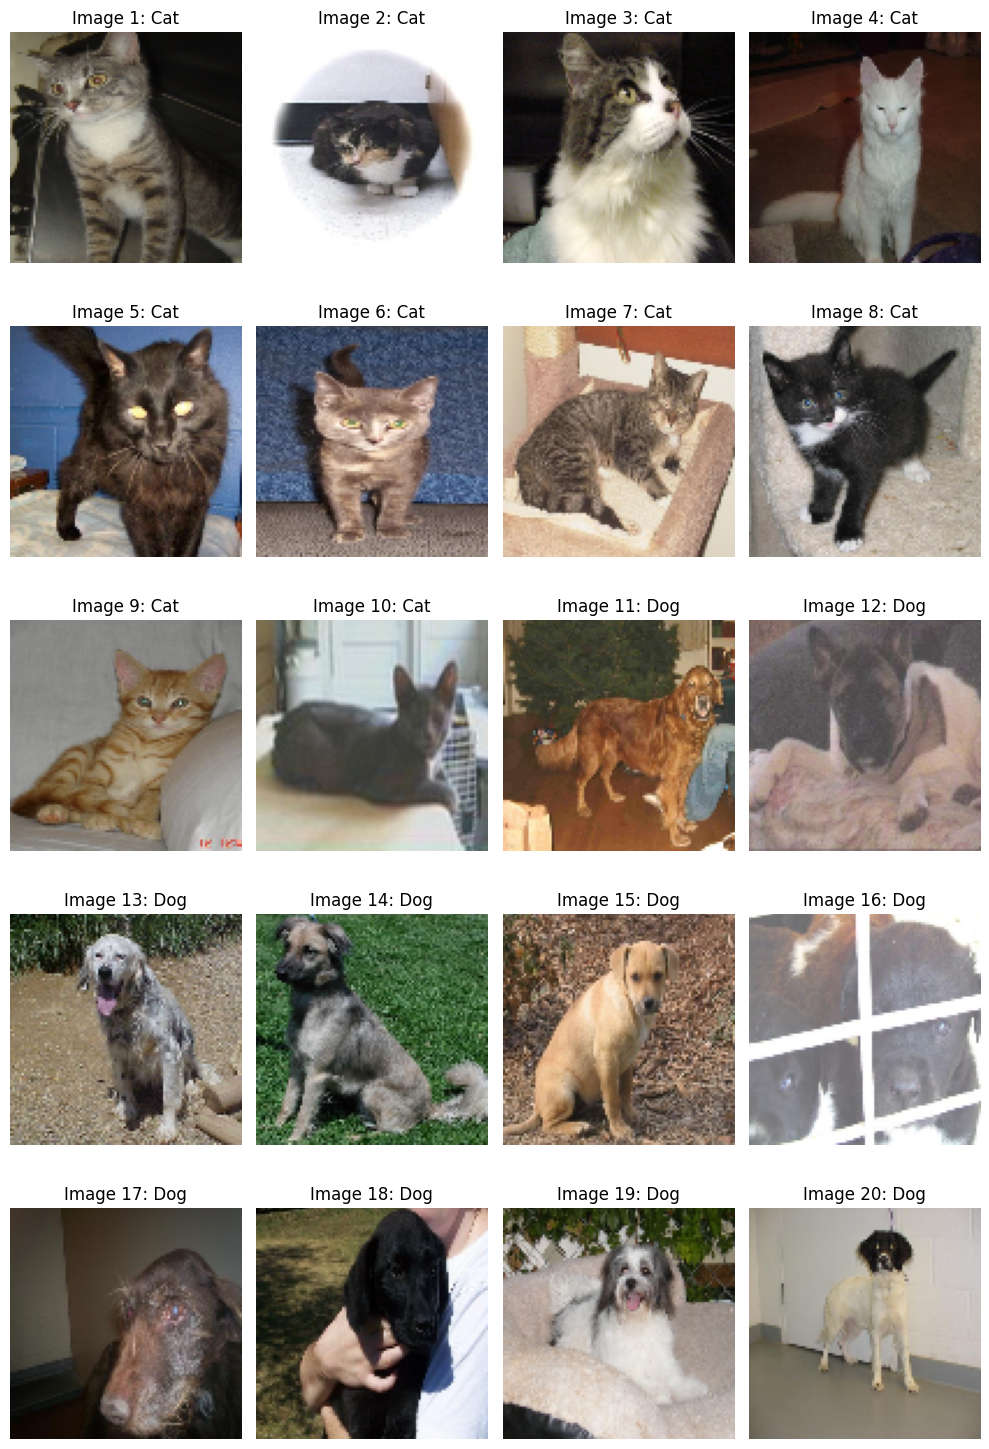

In [ ]:
cat_indices = [i for i, label in enumerate(labels) if label == 'Cat']
dog_indices = [i for i, label in enumerate(labels) if label == 'Dog']

random_cat_indices = random.sample(cat_indices, 10)
random_dog_indices = random.sample(dog_indices, 10)

selected_indices = random_cat_indices + random_dog_indices
selected_images = [Images[i] for i in selected_indices]
selected_labels = [labels[i] for i in selected_indices]


plt.figure(figsize=(10, 15))  # Adjust figure size as needed

for i in range(20):
    plt.subplot(5, 4, i + 1)  # Create a 5x4 grid of subplots
    plt.imshow(cv2.cvtColor(selected_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1}: {selected_labels[i]}")
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [ ]:
X = []
for image in Images:
  X.append(image.flatten())
# Convert to numpy array
X = np.array(X)

print('Shape of the image Array: ',X.shape)

le = LabelEncoder()
Y = le.fit_transform(labels)
Y = np.array(Y)
print('len of the labels Array: ',len(Y), 'with labels', np.unique(Y, return_counts=True))

Shape of the image Array:  (24946, 30000)
len of the labels Array:  24946 with labels (array([0, 1]), array([12476, 12470]))


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import time
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Simple model with Linear Kernel

In [ ]:
# the dataset is too large to perform simple SVC. COnsider reducing the image numbers to perform the below code. (Takes too much time)
from sklearn.svm import SVC
SVM_Model = SVC(kernel='linear')

In [ ]:
start = time.time()
SVM_Model.fit(X_train,y_train)
end = time.time()

In [ ]:
SVC_Pred = SVM_Model.predict(X_test)

precision = precision_score(y_test,SVC_Pred)
accuracy = accuracy_score(y_test,SVC_Pred)
recall = recall_score(y_test,SVC_Pred)
f1_sc = f1_score(y_test,SVC_Pred)
SVC_CM = confusion_matrix(y_test, SVC_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', SVC_CM)

In [ ]:
fig = ConfusionMatrixDisplay(SVC_CM, display_labels= [1,0])
fig.plot()

Simple Model with logistic kernel

In [ ]:
# the dataset is too large to perform simple SVC. COnsider reducing the image numbers to perform the below code. (Takes too much time)
SVM_log_Model = SVC(kernel='logistic')
start = time.time()
SVM_log_Model.fit(X_train,y_train)
end = time.time()

In [ ]:
SVC_Pred = SVM_log_Model.predict(X_test)

precision = precision_score(y_test,SVC_Pred)
accuracy = accuracy_score(y_test,SVC_Pred)
recall = recall_score(y_test,SVC_Pred)
f1_sc = f1_score(y_test,SVC_Pred)
SVC_CM = confusion_matrix(y_test, SVC_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', SVC_CM)

Linear SVC

In [ ]:
# this linear SVC is used when the datasaize is large (one use case), hence used.
from sklearn.svm import LinearSVC
SVM_linear_Model = LinearSVC(C=0.1)
start = time.time()
SVM_linear_Model.fit(X_train,y_train)
end = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
SVC_linear_Pred = SVM_linear_Model.predict(X_test)

precision = precision_score(y_test,SVC_linear_Pred)
accuracy = accuracy_score(y_test,SVC_linear_Pred)
recall = recall_score(y_test,SVC_linear_Pred)
f1_sc = f1_score(y_test,SVC_linear_Pred)
SVC_CM = confusion_matrix(y_test, SVC_linear_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', SVC_CM)

Time for Training:  1797.7294518947601
precision: 0.5159609120521172
accuracy: 0.530060120240481
recall: 0.6483831354891527
f1_score: 0.5746417558498096
Confision Matrix [[1061 1486]
 [ 859 1584]]


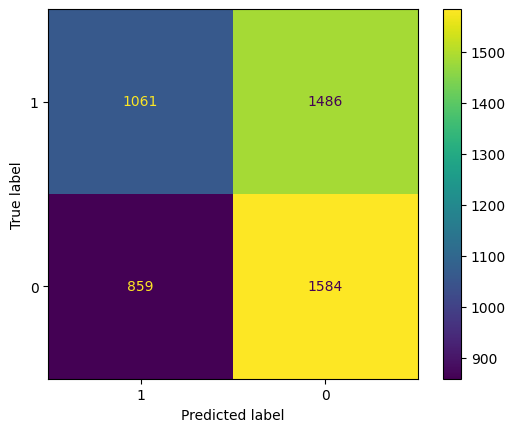

In [ ]:
fig = ConfusionMatrixDisplay(SVC_CM, display_labels=[1, 0])
fig.plot()

SDG classifier with SVM

In [ ]:
# SDG Classifier fits a Support vector machine to the dataset.
from sklearn.linear_model import SGDClassifier
SVM_SDG_Model = SGDClassifier(loss='log_loss')
start = time.time()
SVM_SDG_Model.fit(X_train,y_train)
end = time.time()

In [ ]:
SVC_SDG_Pred = SVM_SDG_Model.predict(X_test)

precision = precision_score(y_test, SVC_SDG_Pred)
accuracy = accuracy_score(y_test, SVC_SDG_Pred)
recall = recall_score(y_test, SVC_SDG_Pred)
f1_sc = f1_score(y_test, SVC_SDG_Pred)
SVC_CM = confusion_matrix(y_test, SVC_SDG_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', SVC_CM)

Time for Training:  306.2177333831787
precision: 0.5281858558250768
accuracy: 0.5434869739478958
recall: 0.6328284895620139
f1_score: 0.5757914338919925
Confision Matrix [[1166 1381]
 [ 897 1546]]


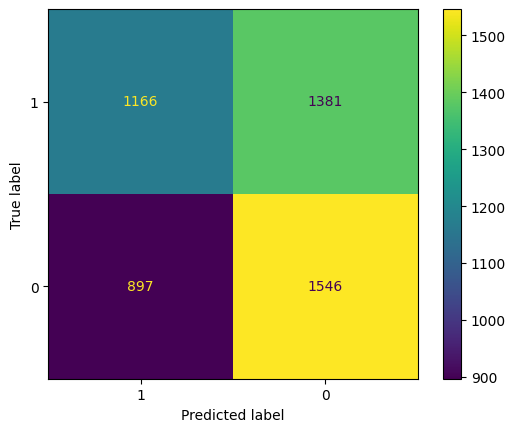

In [ ]:
fig = ConfusionMatrixDisplay(SVC_CM, display_labels=[1, 0])
fig.plot()